# **Fan Hotspots Capstone:**

Project Questions-

- What zip codes should the NBA be targeting first for its campaigns to
increase the number of fans and revenue domestically?

- Given publicly available demographic and economic data identify zip codes
with the most opportunity for NBA in terms of new fans and revenue.

# **Data ingestion**

In [ ]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

fp = "/content/drive/MyDrive/2024-03-06 NBA Fans by Zip.csv"
df1 = pd.read_csv(fp)

fp2 = "/content/drive/MyDrive/NBA Team Zipcodes.csv"
df2 = pd.read_csv(fp2)


In [ ]:
df2 = df2.rename(columns=lambda x: x.strip())

In [ ]:
df1['NBA_FAN_CONCENTRATION'] = df1['NBA_FAN_CONCENTRATION'].round(2)

In [ ]:
df2.head()

,Team,Zipcode
0,Atlanta Hawks,30303
1,Charlotte Hornets,28202
2,Cleveland Cavaliers,44115
3,Denver Nuggets,80204
4,Golden State Warriors,94607


In [ ]:
df2['Zipcode']

0     30303
1     28202
2     44115
3     80204
4     94607
5     46204
6     90015
7     33132
8     55403
9     70003
10    32810
11    85004
12    95814
13    84101
14     2114
15    60612
16    75219
17    48201
18    77002
19    90094
20    38103
21    53203
22    11232
23    10121
24    19148
25    97227
26    78219
27    20004
Name: Zipcode, dtype: int64

In [ ]:
df1['ZIP_CODE'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 32760 entries, 0 to 32759
Series name: ZIP_CODE
Non-Null Count  Dtype
--------------  -----
32760 non-null  int64
dtypes: int64(1)
memory usage: 256.1 KB


In [ ]:
# Assuming 'ZIP_CODE' is the column containing zip codes in df1 and 'Zipcode' is the column containing zip codes in df2
# Create a new column in df1 to store the opportunity level
df1['Opportunity_Level'] = 'Low Opportunity'


In [ ]:

# List of NBA team cities
nba_team_cities = ['Atlanta', 'Boston', 'Brooklyn', 'Charlotte', 'Chicago', 'Cleveland', 'Dallas', 'Denver', 'Detroit', 'Golden State', 'Houston', 'Indiana', 'Los Angeles', 'Memphis', 'Miami', 'Milwaukee', 'Minnesota', 'New Orleans', 'New York', 'Oklahoma City', 'Orlando', 'Philadelphia', 'Phoenix', 'Portland', 'Sacramento', 'San Antonio', 'Toronto', 'Utah', 'Washington D.C.']

# Loop through each row in dataset 1
for index, row in df1.iterrows():
    # Check if the ZIP_CODE is in dataset 2 (NBA team zip codes)
    if row['ZIP_CODE'] in df2['Zipcode'].values:
        # Assign "High Opportunity" opportunity level if the zip code is in dataset 2
        df1.at[index, 'Opportunity_Level'] = 'High Opportunity'
    else:
        # Check if CITY is in the list of NBA team cities
        if row['CITY'] in nba_team_cities:
            # Assign "High Opportunity" opportunity level if CITY is in the list
            df1.at[index, 'Opportunity_Level'] = 'High Opportunity'
        else:
            # Check if STATE is in the specified list for "Medium Opportunity"
            if row['STATE'] in ['FL','OH','CA','OK','IL','NJ','NY','GA','TX','PA','MA','NC','NH','IN','MI','LA','CT','UT','MS','CO','AZ','RI','DC','OR']:
                # Assign "Medium Opportunity" opportunity level
                df1.at[index, 'Opportunity_Level'] = 'Medium Opportunity'
            else:
                # Check if NBA_FAN_CONCENTRATION > 0.50
                if row['NBA_FAN_CONCENTRATION'] > 0.50:
                    # Assign "High Opportunity" opportunity level if NBA_FAN_CONCENTRATION > 0.50
                    df1.at[index, 'Opportunity_Level'] = 'High Opportunity'

# Print the first few rows of df1 with the opportunity levels assigned
print(df1.head())

   ZIP_CODE        LAT        LON  NBA_FAN_CONCENTRATION STATE           CITY  \
0     10003  40.732509  -73.98935                   1.00    NY       New York   
1     30004  34.119177  -84.30292                   0.69    GA     Alpharetta   
2     10019  40.765714  -73.98560                   0.41    NY       New York   
3     78245  29.412338  -98.70484                   0.40    TX    San Antonio   
4     90210  34.088808 -118.40612                   0.39    CA  Beverly Hills   

      DMA_NAME  TOTAL_POPULATION  TOTAL_MALE_POPULATION  \
0     NEW YORK             56767                  27425   
1      ATLANTA             61418                  29760   
2     NEW YORK             39505                  20169   
3  SAN ANTONIO             68265                  33093   
4  LOS ANGELES             20957                   9904   

   TOTAL_FEMALE_POPULATION  MEDIAN_AGE  ESTIMATE_HOUSEHOLDS_TOTAL  \
0                    29342        32.2                    24987.0   
1                   

In [ ]:
df1.head()

,ZIP_CODE,LAT,LON,NBA_FAN_CONCENTRATION,STATE,CITY,DMA_NAME,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME,Opportunity_Level
0,10003,40.732509,-73.98935,1.00,NY,New York,NEW YORK,56767,27425,29342,32.2,24987.0,250384.0,152863,High Opportunity
1,30004,34.119177,-84.30292,0.69,GA,Alpharetta,ATLANTA,61418,29760,31658,37.8,24289.0,192261.0,136124,Medium Opportunity
2,10019,40.765714,-73.98560,0.41,NY,New York,NEW YORK,39505,20169,19336,39.2,26297.0,190544.0,113335,High Opportunity
3,78245,29.412338,-98.70484,0.40,TX,San Antonio,SAN ANTONIO,68265,33093,35172,29.3,29831.0,92752.0,83005,High Opportunity
4,90210,34.088808,-118.40612,0.39,CA,Beverly Hills,LOS ANGELES,20957,9904,11053,47.5,7893.0,332934.0,172285,Medium Opportunity


In [ ]:
df1.tail()

,ZIP_CODE,LAT,LON,NBA_FAN_CONCENTRATION,STATE,CITY,DMA_NAME,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME,Opportunity_Level
32755,83469,45.234391,-114.315650,0.0,ID,Shoup,IDAHO FALLS - POCATELLO,52,26,26,74.1,13.0,NaN,NaN,Low Opportunity
32756,36859,32.229846,-85.008178,0.0,AL,Holy Trinity,"COLUMBUS, GA",40,19,21,58.5,NaN,NaN,NaN,Low Opportunity
32757,29899,33.835620,-82.319983,0.0,SC,McCormick,AUGUSTA,1191,1191,0,41.6,0.0,NaN,NaN,Low Opportunity
32758,99136,46.669207,-117.960150,0.0,WA,Hay,SPOKANE,27,20,7,67.8,13.0,58754.0,NaN,Low Opportunity
32759,88321,34.750736,-105.513070,0.0,NM,Encino,ALBUQUERQUE - SANTA FE,86,42,44,57.9,113.0,72858.0,76121,Low Opportunity


In [ ]:
df=df1

In [ ]:
df[df['Opportunity_Level'] == 'High Opportunity']

,ZIP_CODE,LAT,LON,NBA_FAN_CONCENTRATION,STATE,CITY,DMA_NAME,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME,Opportunity_Level
0,10003,40.732509,-73.98935,1.00,NY,New York,NEW YORK,56767,27425,29342,32.2,24987.0,250384.0,152863,High Opportunity
2,10019,40.765714,-73.98560,0.41,NY,New York,NEW YORK,39505,20169,19336,39.2,26297.0,190544.0,113335,High Opportunity
3,78245,29.412338,-98.70484,0.40,TX,San Antonio,SAN ANTONIO,68265,33093,35172,29.3,29831.0,92752.0,83005,High Opportunity
5,28277,35.054546,-80.81792,0.38,NC,Charlotte,CHARLOTTE,67692,31407,36285,37.9,28385.0,159304.0,117369,High Opportunity
6,28269,35.329235,-80.80486,0.38,NC,Charlotte,CHARLOTTE,77321,37661,39660,34.6,30433.0,94980.0,76560,High Opportunity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31829,64441,40.386181,-94.28975,0.00,MO,Denver,KANSAS CITY,163,87,76,61.5,55.0,52738.0,39688,High Opportunity
31964,80294,39.749436,-104.98948,0.00,CO,Denver,DENVER,0,0,0,NaN,0.0,NaN,NaN,High Opportunity
32252,68042,41.095604,-96.43168,0.00,NE,Memphis,OMAHA,98,48,50,43.5,38.0,67100.0,36786,High Opportunity
32379,83601,43.801588,-115.13085,0.00,ID,Atlanta,BOISE,35,27,8,75.2,NaN,NaN,NaN,High Opportunity


In [ ]:
df[df['Opportunity_Level'] == 'Medium Opportunity']

,ZIP_CODE,LAT,LON,NBA_FAN_CONCENTRATION,STATE,CITY,DMA_NAME,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME,Opportunity_Level
1,30004,34.119177,-84.30292,0.69,GA,Alpharetta,ATLANTA,61418,29760,31658,37.8,24289.0,192261.0,136124,Medium Opportunity
4,90210,34.088808,-118.40612,0.39,CA,Beverly Hills,LOS ANGELES,20957,9904,11053,47.5,7893.0,332934.0,172285,Medium Opportunity
8,86004,35.253002,-111.44851,0.37,AZ,Flagstaff,PHOENIX (PRESCOTT),37215,18509,18706,34.4,13939.0,99293.0,73765,Medium Opportunity
14,85201,33.432177,-111.84701,0.35,AZ,Mesa,PHOENIX (PRESCOTT),50323,25117,25206,30.7,20978.0,74674.0,57684,Medium Opportunity
16,95630,38.672127,-121.15783,0.34,CA,Folsom,SACRAMNTO - STKTN - MODESTO,74905,40112,34793,40.3,28274.0,159916.0,134844,Medium Opportunity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32700,62078,39.477337,-90.48002,0.00,IL,Patterson,ST. LOUIS,100,47,53,40.5,31.0,64565.0,NaN,Medium Opportunity
32725,76685,31.357970,-97.02091,0.00,TX,Satin,WACO - TEMPLE - BRYAN,33,33,0,NaN,31.0,42832.0,NaN,Medium Opportunity
32729,17885,40.851747,-77.31213,0.00,PA,Weikert,WILKES BARRE - SCRANTON,171,97,74,61.3,96.0,72209.0,71500,Medium Opportunity
32738,43928,40.008421,-80.88913,0.00,OH,Glencoe,WHEELING - STEUBENVILLE,0,0,0,NaN,33.0,100845.0,115625,Medium Opportunity


In [ ]:
df[df['Opportunity_Level'] == 'Low Opportunity']

,ZIP_CODE,LAT,LON,NBA_FAN_CONCENTRATION,STATE,CITY,DMA_NAME,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME,Opportunity_Level
76,22201,38.885337,-77.095120,0.24,VA,Arlington,"WASHINGTON, DC (HAGRSTWN)",36166,18266,17900,31.5,19796.0,177903.0,140453,Low Opportunity
83,38017,35.057224,-89.674170,0.24,TN,Collierville,MEMPHIS,52283,24927,27356,40.1,19612.0,169699.0,131354,Low Opportunity
95,20878,39.117550,-77.235480,0.23,MD,Gaithersburg,"WASHINGTON, DC (HAGRSTWN)",64356,31242,33114,38.6,24222.0,186488.0,141902,Low Opportunity
96,20854,39.035028,-77.199950,0.23,MD,Potomac,"WASHINGTON, DC (HAGRSTWN)",49926,24665,25261,47.2,16701.0,309519.0,241697,Low Opportunity
106,20147,39.041978,-77.490640,0.22,VA,Ashburn,"WASHINGTON, DC (HAGRSTWN)",62907,30176,32731,34.7,24316.0,183560.0,154714,Low Opportunity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32755,83469,45.234391,-114.315650,0.00,ID,Shoup,IDAHO FALLS - POCATELLO,52,26,26,74.1,13.0,NaN,NaN,Low Opportunity
32756,36859,32.229846,-85.008178,0.00,AL,Holy Trinity,"COLUMBUS, GA",40,19,21,58.5,NaN,NaN,NaN,Low Opportunity
32757,29899,33.835620,-82.319983,0.00,SC,McCormick,AUGUSTA,1191,1191,0,41.6,0.0,NaN,NaN,Low Opportunity
32758,99136,46.669207,-117.960150,0.00,WA,Hay,SPOKANE,27,20,7,67.8,13.0,58754.0,NaN,Low Opportunity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32760 entries, 0 to 32759
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ZIP_CODE                           32760 non-null  int64  
 1   LAT                                32760 non-null  float64
 2   LON                                32760 non-null  float64
 3   NBA_FAN_CONCENTRATION              32760 non-null  float64
 4   STATE                              32760 non-null  object 
 5   CITY                               32760 non-null  object 
 6   DMA_NAME                           32576 non-null  object 
 7   TOTAL_POPULATION                   32760 non-null  int64  
 8   TOTAL_MALE_POPULATION              32760 non-null  int64  
 9   TOTAL_FEMALE_POPULATION            32760 non-null  int64  
 10  MEDIAN_AGE                         32242 non-null  float64
 11  ESTIMATE_HOUSEHOLDS_TOTAL          32569 non-null  flo

In [ ]:
df.isnull().sum()

ZIP_CODE                                0
LAT                                     0
LON                                     0
NBA_FAN_CONCENTRATION                   0
STATE                                   0
CITY                                    0
DMA_NAME                              184
TOTAL_POPULATION                        0
TOTAL_MALE_POPULATION                   0
TOTAL_FEMALE_POPULATION                 0
MEDIAN_AGE                            518
ESTIMATE_HOUSEHOLDS_TOTAL             191
ESTIMATE_HOUSEHOLDS_MEAN_INCOME      1452
ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME    2689
Opportunity_Level                       0
dtype: int64

In [ ]:
rows_with_null = df[['DMA_NAME','MEDIAN_AGE','ESTIMATE_HOUSEHOLDS_TOTAL','ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME','ESTIMATE_HOUSEHOLDS_MEAN_INCOME']]

In [ ]:
rows_with_null[rows_with_null.isnull() == True]

,DMA_NAME,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME,ESTIMATE_HOUSEHOLDS_MEAN_INCOME
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
32755,NaN,NaN,NaN,NaN,NaN
32756,NaN,NaN,NaN,NaN,NaN
32757,NaN,NaN,NaN,NaN,NaN
32758,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[['DMA_NAME','MEDIAN_AGE','ESTIMATE_HOUSEHOLDS_TOTAL','ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME','ESTIMATE_HOUSEHOLDS_MEAN_INCOME']].describe()

,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME
count,32242.000000,32569.000000,3.130800e+04
mean,42.103629,3806.298106,9.264367e+04
std,8.754146,5566.612246,4.327862e+04
min,5.600000,0.000000,8.132000e+03
25%,36.700000,269.000000,6.786075e+04
50%,41.800000,1058.000000,8.297400e+04
75%,46.800000,5179.000000,1.052060e+05
max,95.300000,41653.000000,1.605259e+06


In [ ]:
df['MEDIAN_AGE'].median().round()

42.0

In [ ]:
# Remove non-numeric characters from the column
df['ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME'] = df['ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME'].str.replace(',', '').str.replace('+', '')

# Convert the column to float
df['ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME'] = df['ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME'].astype(float)

In [ ]:
df['ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME'].median()

67030.0

In [ ]:
df['ESTIMATE_HOUSEHOLDS_TOTAL'].mean()

3806.2981055605023

In [ ]:
df['ESTIMATE_HOUSEHOLDS_MEAN_INCOME'].mean().round()

92644.0

In [ ]:
df[df['DMA_NAME'].isnull()][['STATE', 'CITY', 'DMA_NAME']]

,STATE,CITY,DMA_NAME
8973,AK,Ketchikan,NaN
9252,AK,Kodiak,NaN
10285,AK,Sitka,NaN
11004,AK,Bethel,NaN
11996,AK,Barrow,NaN
...,...,...,...
32699,AK,Crooked Creek,NaN
32702,AK,Lake Minchumina,NaN
32735,AK,Chicken,NaN
32748,AK,Bettles Field,NaN


In [ ]:
df['MEDIAN_AGE'].fillna(42, inplace=True)
df['ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME'].fillna(67030.0, inplace=True)
df['ESTIMATE_HOUSEHOLDS_TOTAL'].fillna(3806.0, inplace=True)
df['ESTIMATE_HOUSEHOLDS_MEAN_INCOME'].fillna(92644.0, inplace=True)
df['DMA_NAME'].fillna('N/A', inplace=True)


In [ ]:
df.head()

,ZIP_CODE,LAT,LON,NBA_FAN_CONCENTRATION,STATE,CITY,DMA_NAME,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME,Opportunity_Level
0,10003,40.732509,-73.98935,1.00,NY,New York,NEW YORK,56767,27425,29342,32.2,24987.0,250384.0,152863.0,High Opportunity
1,30004,34.119177,-84.30292,0.69,GA,Alpharetta,ATLANTA,61418,29760,31658,37.8,24289.0,192261.0,136124.0,Medium Opportunity
2,10019,40.765714,-73.98560,0.41,NY,New York,NEW YORK,39505,20169,19336,39.2,26297.0,190544.0,113335.0,High Opportunity
3,78245,29.412338,-98.70484,0.40,TX,San Antonio,SAN ANTONIO,68265,33093,35172,29.3,29831.0,92752.0,83005.0,High Opportunity
4,90210,34.088808,-118.40612,0.39,CA,Beverly Hills,LOS ANGELES,20957,9904,11053,47.5,7893.0,332934.0,172285.0,Medium Opportunity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32760 entries, 0 to 32759
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ZIP_CODE                           32760 non-null  int64  
 1   LAT                                32760 non-null  float64
 2   LON                                32760 non-null  float64
 3   NBA_FAN_CONCENTRATION              32760 non-null  float64
 4   STATE                              32760 non-null  object 
 5   CITY                               32760 non-null  object 
 6   DMA_NAME                           32760 non-null  object 
 7   TOTAL_POPULATION                   32760 non-null  int64  
 8   TOTAL_MALE_POPULATION              32760 non-null  int64  
 9   TOTAL_FEMALE_POPULATION            32760 non-null  int64  
 10  MEDIAN_AGE                         32760 non-null  float64
 11  ESTIMATE_HOUSEHOLDS_TOTAL          32760 non-null  flo

In [ ]:
df.isnull().sum()

ZIP_CODE                             0
LAT                                  0
LON                                  0
NBA_FAN_CONCENTRATION                0
STATE                                0
CITY                                 0
DMA_NAME                             0
TOTAL_POPULATION                     0
TOTAL_MALE_POPULATION                0
TOTAL_FEMALE_POPULATION              0
MEDIAN_AGE                           0
ESTIMATE_HOUSEHOLDS_TOTAL            0
ESTIMATE_HOUSEHOLDS_MEAN_INCOME      0
ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME    0
Opportunity_Level                    0
dtype: int64

# **Data Visualization**

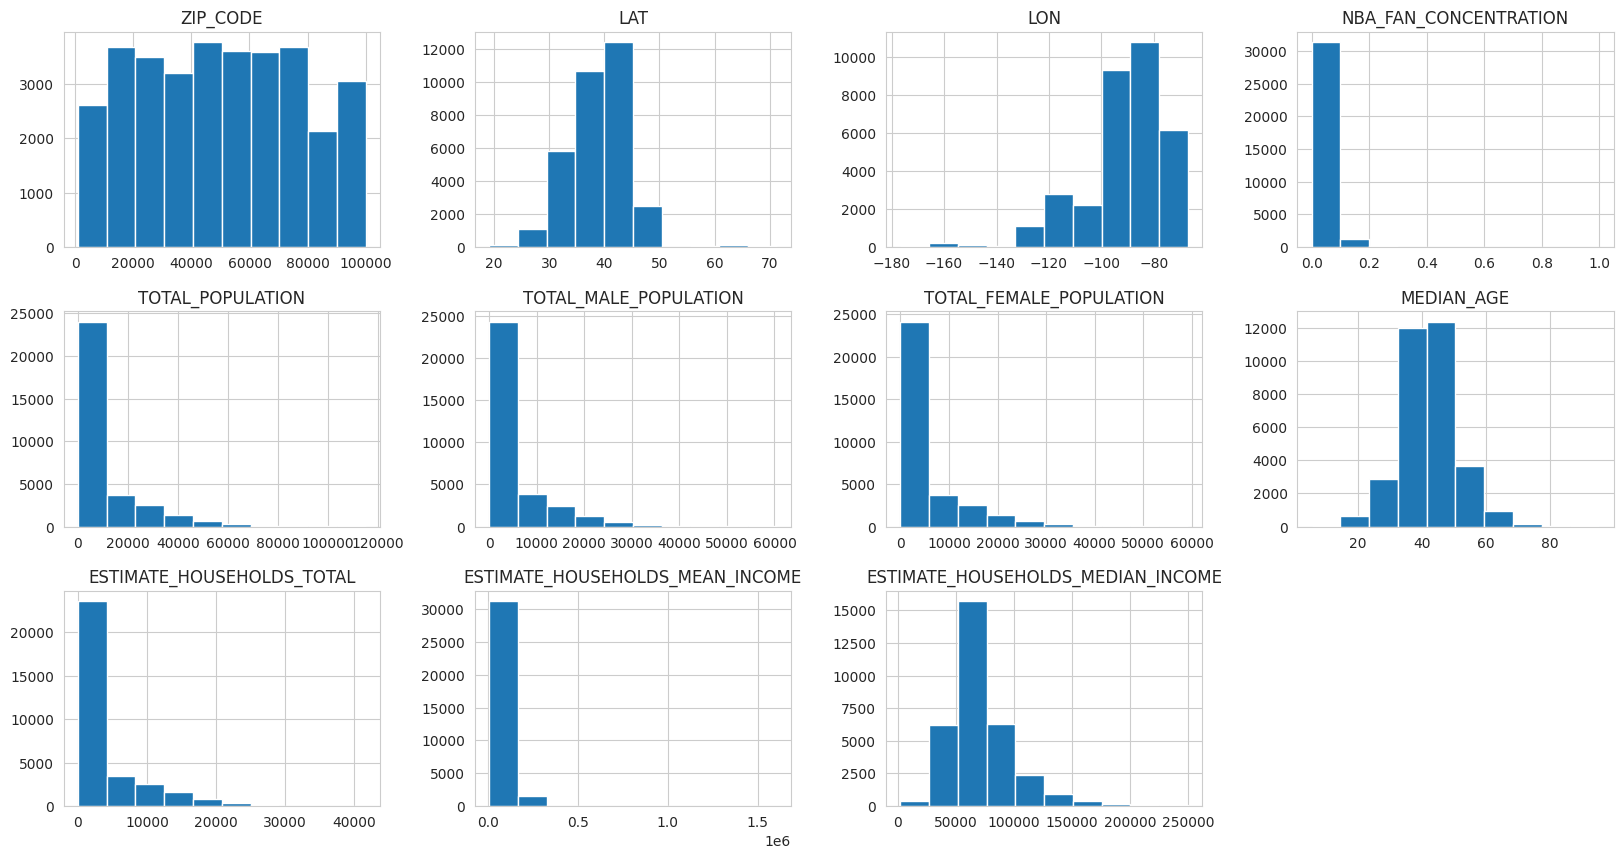

In [ ]:
#Here we want to check the distribution of our numerical columns
#This gives us more insights about how the data is skewed per column
columns = list(df)[:]

df[columns].hist(figsize=(20,50),layout=(14,4))

plt.show()

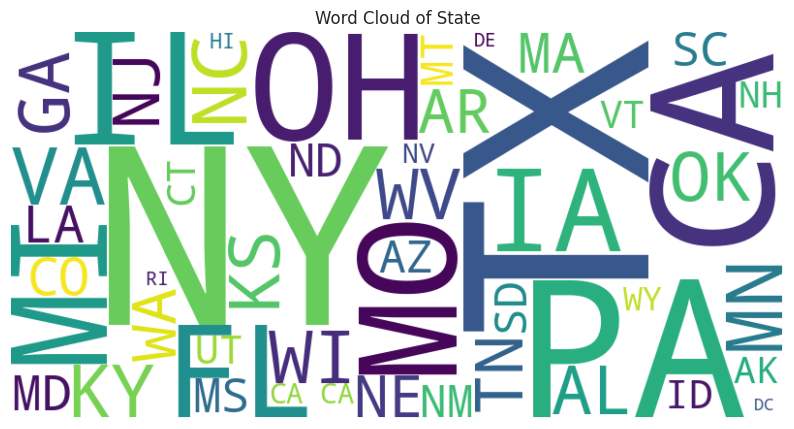

In [ ]:
#Now lets visualize the frequency of each State that was mentioned in the Dataset
from wordcloud import WordCloud

# Combine all names into a single string
all_names = ' '.join(df['STATE'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_names)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of State')
plt.axis('off')  # Turn off axis
plt.show()

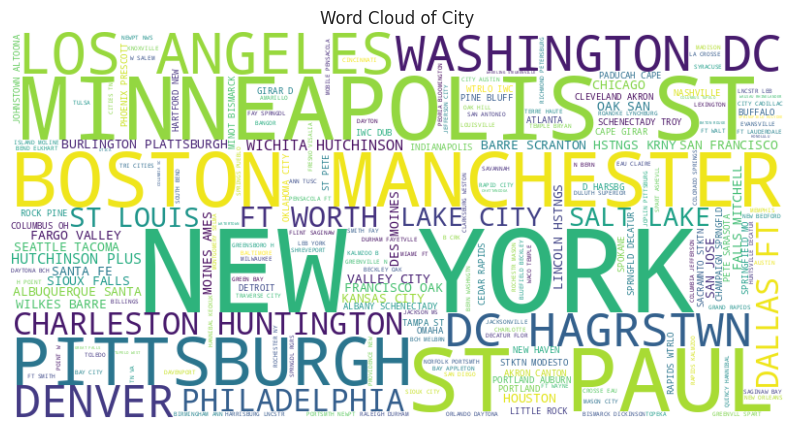

In [ ]:
#Now lets visualize the frequency of each DMA_NAME that was mentioned in the Dataset
from wordcloud import WordCloud

# Combine all names into a single string
all_names = ' '.join(df['DMA_NAME'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_names)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of City')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
df_numerical = df.select_dtypes(include=[np.number])
df_numerical.corr()

,ZIP_CODE,LAT,LON,NBA_FAN_CONCENTRATION,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME
ZIP_CODE,1.000000,-0.073005,-0.901896,0.022386,0.044011,0.050630,0.037564,-0.080497,0.024550,-0.078592,-0.083806
LAT,-0.073005,1.000000,-0.082348,-0.117277,-0.190139,-0.189984,-0.189793,0.087944,-0.181592,0.065459,0.101946
LON,-0.901896,-0.082348,1.000000,-0.024633,-0.047053,-0.053718,-0.040553,0.070359,-0.024337,0.021793,0.026390
NBA_FAN_CONCENTRATION,0.022386,-0.117277,-0.024633,1.000000,0.799259,0.794730,0.801514,-0.233696,0.811696,0.301898,0.288755
TOTAL_POPULATION,0.044011,-0.190139,-0.047053,0.799259,1.000000,0.998611,0.998728,-0.300104,0.976429,0.193794,0.178135
TOTAL_MALE_POPULATION,0.050630,-0.189984,-0.053718,0.794730,0.998611,1.000000,0.994685,-0.304343,0.972971,0.193859,0.178980
TOTAL_FEMALE_POPULATION,0.037564,-0.189793,-0.040553,0.801514,0.998728,0.994685,1.000000,-0.295269,0.977199,0.193229,0.176863
MEDIAN_AGE,-0.080497,0.087944,0.070359,-0.233696,-0.300104,-0.304343,-0.295269,1.000000,-0.273505,0.042215,0.032636
ESTIMATE_HOUSEHOLDS_TOTAL,0.024550,-0.181592,-0.024337,0.811696,0.976429,0.972971,0.977199,-0.273505,1.000000,0.208535,0.185457
ESTIMATE_HOUSEHOLDS_MEAN_INCOME,-0.078592,0.065459,0.021793,0.301898,0.193794,0.193859,0.193229,0.042215,0.208535,1.000000,0.864354


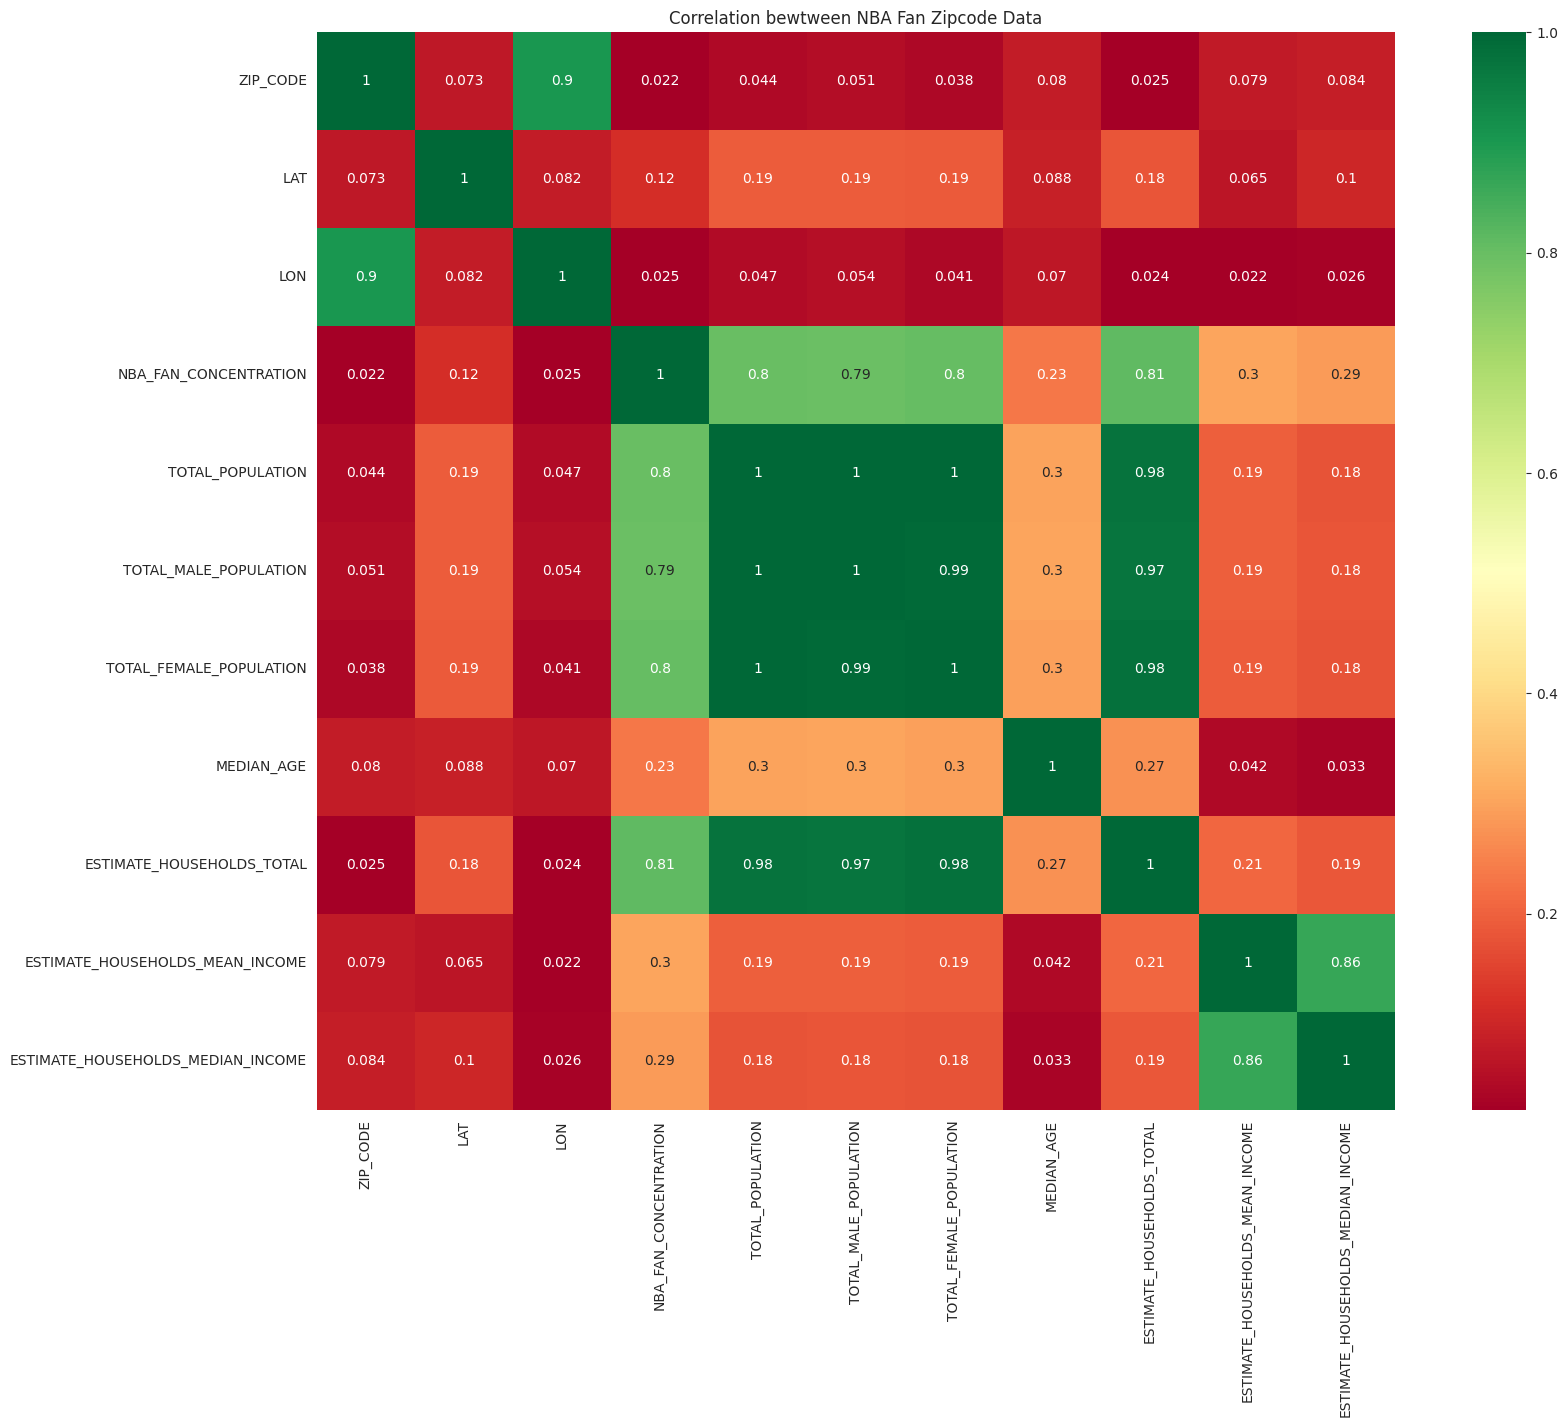

In [ ]:
#Now lets visualize this in a heatmap

plt.subplots(figsize=(20,14))

sns.heatmap(df_numerical.corr().abs(),vmax=1,square=True,annot=True,cmap='RdYlGn')

plt.title("Correlation bewtween NBA Fan Zipcode Data")

plt.show()

<Axes: ylabel='frequency'>

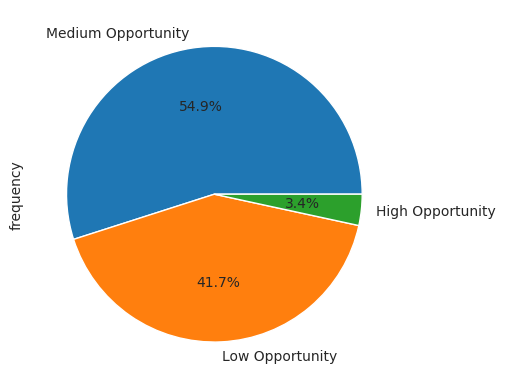

In [ ]:
#Now lets visualize the Opportunity_Level

df["Opportunity_Level"].value_counts().plot(kind='pie',ylabel='frequency',autopct='%1.1f%%')

# **Data Preprocessing**

In [ ]:
#Check Data Types

df.dtypes

ZIP_CODE                               int64
LAT                                  float64
LON                                  float64
NBA_FAN_CONCENTRATION                float64
STATE                                 object
CITY                                  object
DMA_NAME                              object
TOTAL_POPULATION                       int64
TOTAL_MALE_POPULATION                  int64
TOTAL_FEMALE_POPULATION                int64
MEDIAN_AGE                           float64
ESTIMATE_HOUSEHOLDS_TOTAL            float64
ESTIMATE_HOUSEHOLDS_MEAN_INCOME      float64
ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME    float64
Opportunity_Level                     object
dtype: object

In [ ]:
# There are a couple Null values but we must see if we wan to keep them or replace and delete them moving forward

df.isnull().sum()

ZIP_CODE                             0
LAT                                  0
LON                                  0
NBA_FAN_CONCENTRATION                0
STATE                                0
CITY                                 0
DMA_NAME                             0
TOTAL_POPULATION                     0
TOTAL_MALE_POPULATION                0
TOTAL_FEMALE_POPULATION              0
MEDIAN_AGE                           0
ESTIMATE_HOUSEHOLDS_TOTAL            0
ESTIMATE_HOUSEHOLDS_MEAN_INCOME      0
ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME    0
Opportunity_Level                    0
dtype: int64

# **Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your original DataFrame containing all features including the categorical ones
# Extract the non-categorical features from df and store them in a separate DataFrame
non_categorical_features = df.drop(['STATE', 'CITY', 'DMA_NAME'], axis=1)


# Concatenate the original non-categorical features with the encoded categorical features
X = pd.concat([non_categorical_features], axis=1)

# Print the first few rows of X to verify
X = X.drop(['Opportunity_Level'],axis=1)

In [ ]:
X

,ZIP_CODE,LAT,LON,NBA_FAN_CONCENTRATION,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME
0,10003,40.732509,-73.989350,1.00,56767,27425,29342,32.2,24987.0,250384.0,152863.0
1,30004,34.119177,-84.302920,0.69,61418,29760,31658,37.8,24289.0,192261.0,136124.0
2,10019,40.765714,-73.985600,0.41,39505,20169,19336,39.2,26297.0,190544.0,113335.0
3,78245,29.412338,-98.704840,0.40,68265,33093,35172,29.3,29831.0,92752.0,83005.0
4,90210,34.088808,-118.406120,0.39,20957,9904,11053,47.5,7893.0,332934.0,172285.0
...,...,...,...,...,...,...,...,...,...,...,...
32755,83469,45.234391,-114.315650,0.00,52,26,26,74.1,13.0,92644.0,67030.0
32756,36859,32.229846,-85.008178,0.00,40,19,21,58.5,3806.0,92644.0,67030.0
32757,29899,33.835620,-82.319983,0.00,1191,1191,0,41.6,0.0,92644.0,67030.0
32758,99136,46.669207,-117.960150,0.00,27,20,7,67.8,13.0,58754.0,67030.0


In [ ]:
y = df['Opportunity_Level']
y

0          High Opportunity
1        Medium Opportunity
2          High Opportunity
3          High Opportunity
4        Medium Opportunity
                ...        
32755       Low Opportunity
32756       Low Opportunity
32757       Low Opportunity
32758       Low Opportunity
32759       Low Opportunity
Name: Opportunity_Level, Length: 32760, dtype: object

In [ ]:
#Now we can label and fit y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 2, 0, ..., 1, 1, 1])

In [ ]:
#le.classes_ breaks up the labels into an array for us
#to view to see if it got the correct labels

le.classes_

array(['High Opportunity', 'Low Opportunity', 'Medium Opportunity'],
      dtype=object)

# **Splitting X and y**

In [ ]:
#import train_test_split from scikit learn
from sklearn.model_selection import train_test_split

#Now we need to start to train and test the AI model
#first thing we need to do is bring in our test_train_split module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train.shape

(26208, 11)

# **Modeling**

In [ ]:
#Looks good now we can start using KNN Classificatoin
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Instantiate learning model (k = 7)
classifier = KNeighborsClassifier(n_neighbors=7)

In [ ]:
X_train

,ZIP_CODE,LAT,LON,NBA_FAN_CONCENTRATION,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION,MEDIAN_AGE,ESTIMATE_HOUSEHOLDS_TOTAL,ESTIMATE_HOUSEHOLDS_MEAN_INCOME,ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME
2145,22150,38.778243,-77.18562,0.07,26853,13381,13472,39.3,9450.0,136032.0,112331.0
32411,61324,41.770952,-89.41267,0.00,84,52,32,55.5,40.0,59598.0,67030.0
9737,16701,41.943791,-78.65448,0.01,17704,8848,8856,40.2,6744.0,74538.0,56748.0
31601,63560,40.367584,-93.11823,0.00,145,105,40,61.7,25.0,43596.0,41250.0
10727,37725,35.996454,-83.39791,0.01,16823,8429,8394,46.8,6707.0,85388.0,61897.0
...,...,...,...,...,...,...,...,...,...,...,...
29802,24412,38.054111,-79.84575,0.00,54,27,27,65.9,104.0,92644.0,67030.0
5390,60191,41.962979,-87.97688,0.03,14429,7032,7397,41.0,5226.0,105120.0,86565.0
860,95864,38.587805,-121.37809,0.12,23527,11470,12057,45.8,9930.0,178381.0,123535.0
15795,3226,43.721094,-71.49652,0.00,1011,516,495,51.5,384.0,111029.0,100192.0


In [ ]:
# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#### 4.2 Evaluating predictions
cm = confusion_matrix(y_test,y_pred)
cm

array([[  29,   42,  148],
       [  10, 2083,  604],
       [  24,  548, 3064]])

In [ ]:
#Confusion matrix may seem like an odd name, but it really serves to tell us how much confusion (error) there is in the model and what type of error.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,29,42,148,219
1,10,2083,604,2697
2,24,548,3064,3636
All,63,2673,3816,6552


In [ ]:
#Here we will do a classification report
#A classificarion report is usally used in tandem with a confusion matrix
#it is used to give precision, recall, f-1 Score, and support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.13      0.21       219
           1       0.78      0.77      0.78      2697
           2       0.80      0.84      0.82      3636

    accuracy                           0.79      6552
   macro avg       0.68      0.58      0.60      6552
weighted avg       0.78      0.79      0.78      6552



Text(50.722222222222214, 0.5, 'Truth')

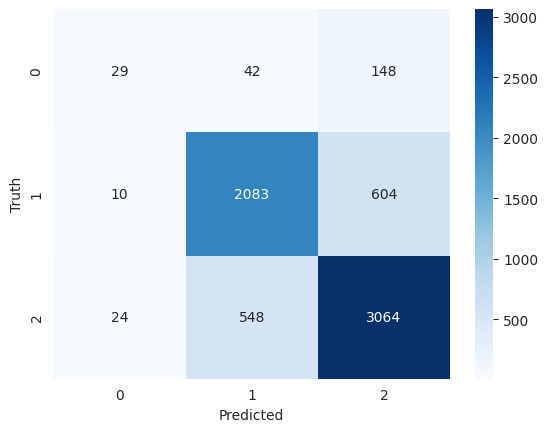

In [ ]:
#Time to plot the confusion matix
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='g',cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Calculating model accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 79.0 %.


In [ ]:
#The accuracy is not bad at all but it can always be better
#k-fold cross-validation is one of the most popular strategies widely used by data scientists.
#This evaluates a models performance and will help us understand what K cvalue or neighbors we should have used in the model for better accuracy
#Using cross-validation for parameter tuning

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

In [ ]:
# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

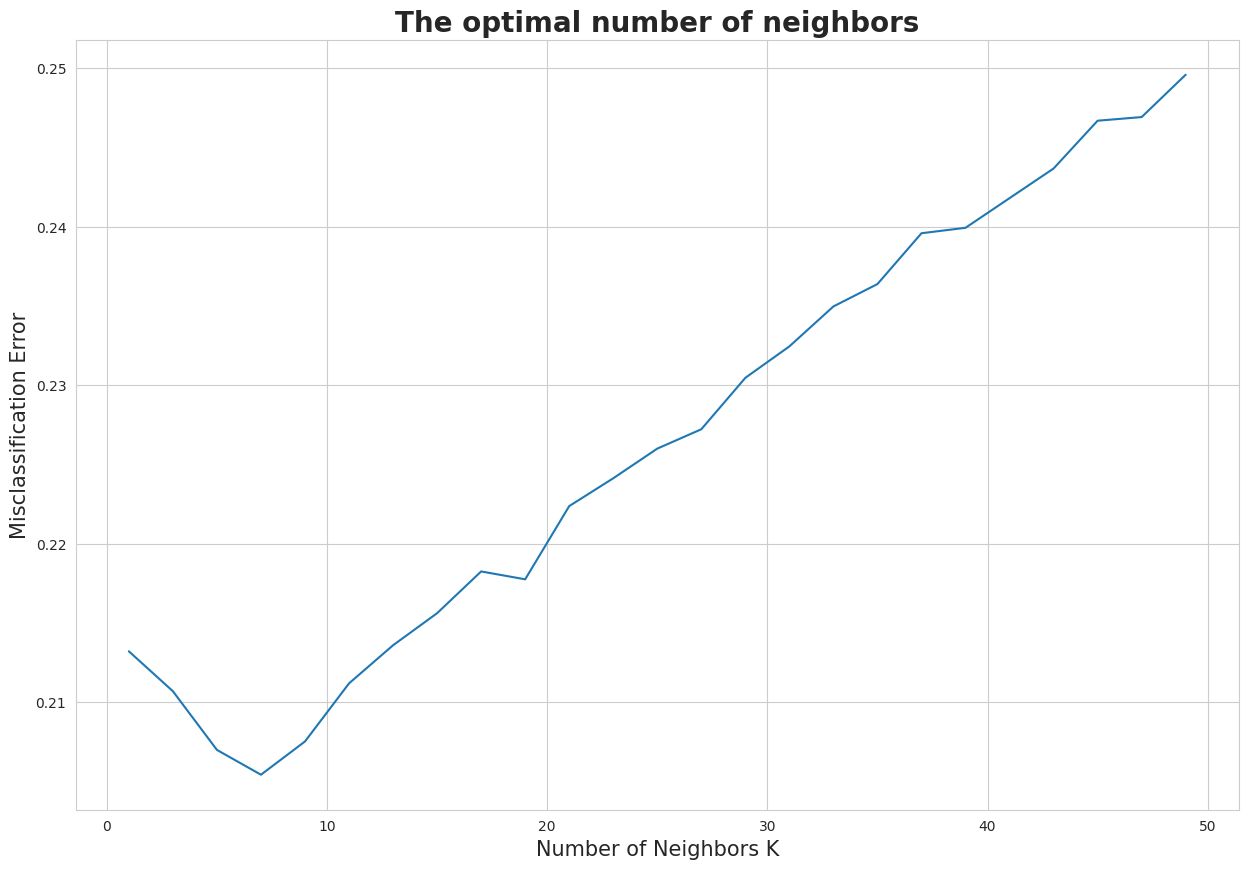

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

#Below on the chart it is showing us the optimal number of neighbors
#As you can seee below around 7 neihbors was the lowest
#The error rate started to spike after that

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

#The optimal number of neigbors was 7 which means that we entered  a good neighbor value
#below shows value 7

The optimal number of neighbors is 7.


Text(0, 0.5, 'Mean Error')

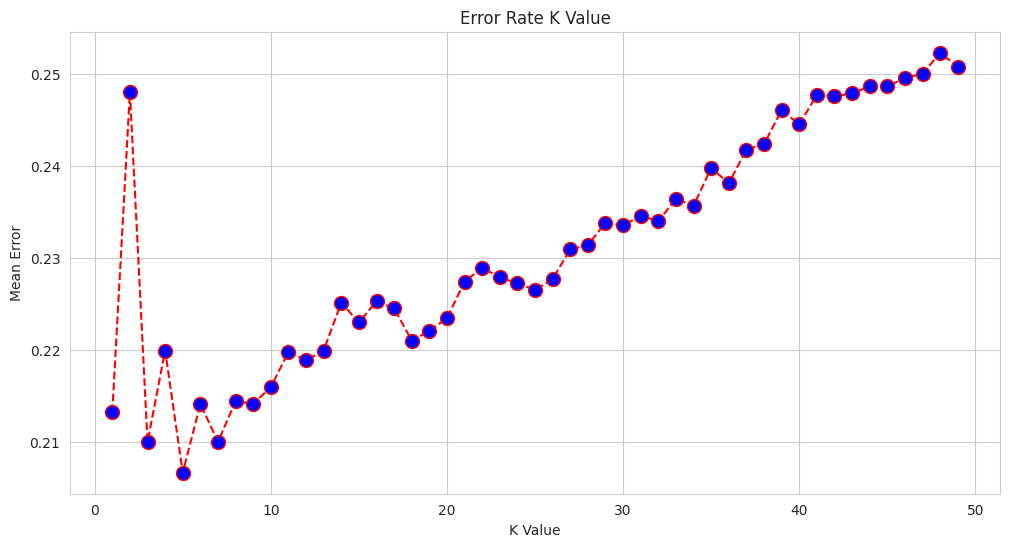

In [ ]:
#Below is showing the error rate of k
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#This is providing us with information on how the error rate is for kvalue
#looks like anything around the 3-5 range was okay
#Everything before and after were not good kvalues to initiate

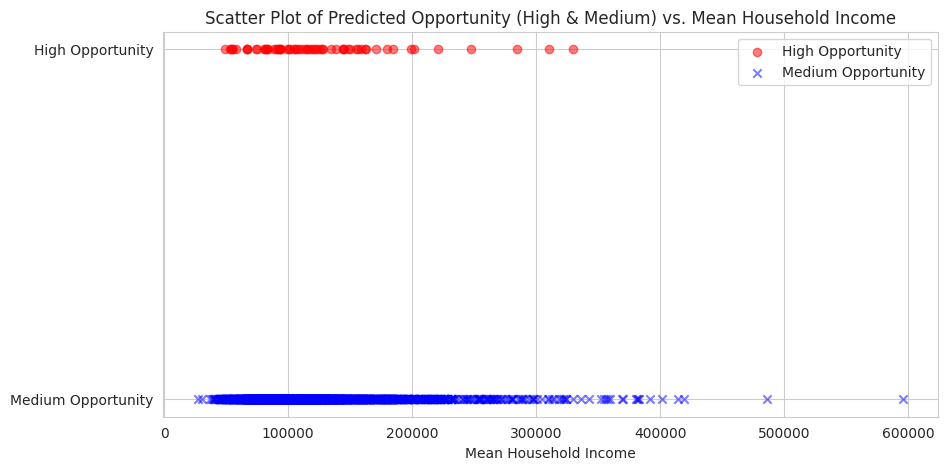

In [ ]:
import matplotlib.pyplot as plt

# Filter data for high and medium priority predictions
high_priority_indices = [i for i, prediction in enumerate(y_pred) if prediction == 0]
medium_priority_indices = [i for i, prediction in enumerate(y_pred) if prediction == 1]

# Extract corresponding data for high and medium priority predictions
high_priority_incomes = df1.iloc[high_priority_indices]['ESTIMATE_HOUSEHOLDS_MEAN_INCOME']
medium_priority_incomes = df1.iloc[medium_priority_indices]['ESTIMATE_HOUSEHOLDS_MEAN_INCOME']
high_priority_zipcodes = df1.iloc[high_priority_indices]['ZIP_CODE']
medium_priority_zipcodes = df1.iloc[medium_priority_indices]['ZIP_CODE']

# Scatter plot
plt.figure(figsize=(10, 5))

# Scatter plot for high priority predictions
plt.scatter(high_priority_incomes, [1] * len(high_priority_incomes), color='red', marker='o', label='High Opportunity', alpha=0.5)

# Scatter plot for medium priority predictions
plt.scatter(medium_priority_incomes, [0] * len(medium_priority_incomes), color='blue', marker='x', label='Medium Opportunity', alpha=0.5)

# Labels and title
plt.xlabel('Mean Household Income')
plt.yticks([0, 1], ['Medium Opportunity', 'High Opportunity'])
plt.title('Scatter Plot of Predicted Opportunity (High & Medium) vs. Mean Household Income')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

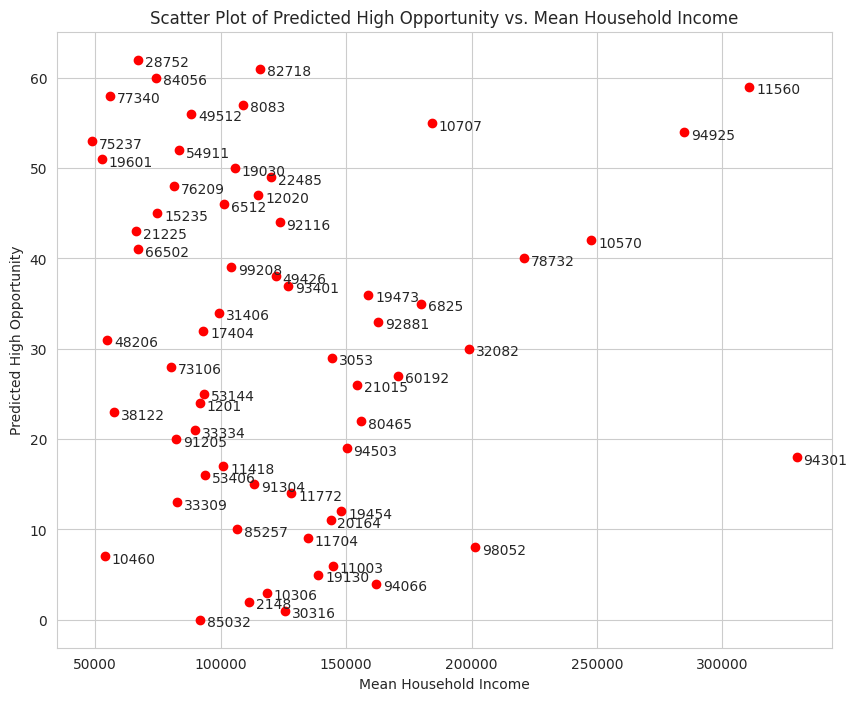

In [ ]:
import matplotlib.pyplot as plt

# Filter data for high priority predictions
high_priority_indices = [i for i, prediction in enumerate(y_pred) if prediction == 0]
high_priority_incomes = df1.iloc[high_priority_indices]['ESTIMATE_HOUSEHOLDS_MEAN_INCOME']
high_priority_zipcodes = df1.iloc[high_priority_indices]['ZIP_CODE']

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(high_priority_incomes, range(len(high_priority_incomes)), color='red', label='High Opportunity')

# Add zip codes as annotations
for i, txt in enumerate(high_priority_zipcodes):
    plt.annotate(txt, (high_priority_incomes.iloc[i], i), xytext=(5, -5), textcoords='offset points')

# Labels and title
plt.xlabel('Mean Household Income')
plt.ylabel('Predicted High Opportunity')
plt.title('Scatter Plot of Predicted High Opportunity vs. Mean Household Income')

# Show plot
plt.show()

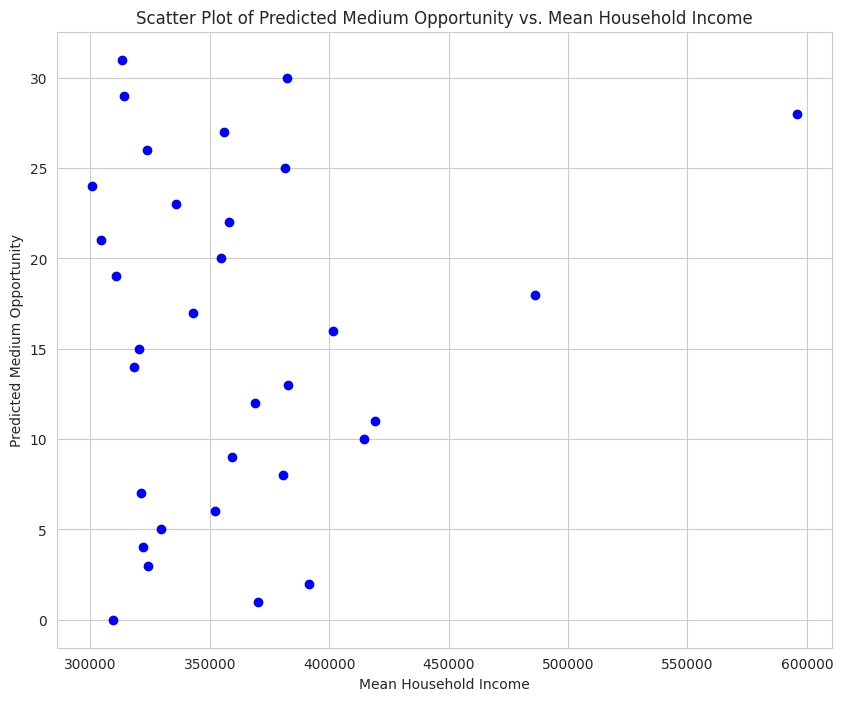

In [ ]:
import matplotlib.pyplot as plt

# Filter data for high priority predictions
high_priority_indices = [i for i, prediction in enumerate(y_pred) if prediction == 1]
high_priority_incomes = df1.iloc[high_priority_indices]['ESTIMATE_HOUSEHOLDS_MEAN_INCOME']
high_priority_zipcodes = df1.iloc[high_priority_indices]['ZIP_CODE']

# Filter incomes greater than 300000 and corresponding zip codes
high_priority_incomes = high_priority_incomes[high_priority_incomes > 300000]
high_priority_zipcodes = high_priority_zipcodes[:len(high_priority_incomes)]

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(high_priority_incomes, range(len(high_priority_incomes)), color='blue', label='Medium Opportunity')

# Add zip codes as annotations


# Labels and title
plt.xlabel('Mean Household Income')
plt.ylabel('Predicted Medium Opportunity')
plt.title('Scatter Plot of Predicted Medium Opportunity vs. Mean Household Income')

# Show plot
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Predicted High Opportunity vs. Median Household Income')

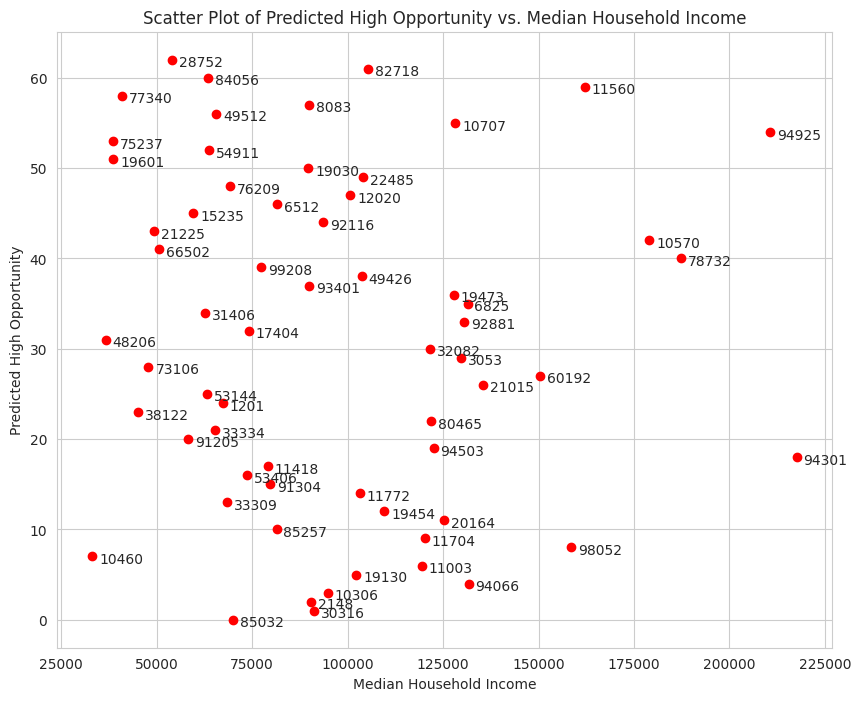

In [ ]:
import matplotlib.pyplot as plt

# Filter data for high priority predictions
high_priority_indices = [i for i, prediction in enumerate(y_pred) if prediction == 0]
high_priority_incomes = df1.iloc[high_priority_indices]['ESTIMATE_HOUSEHOLDS_MEDIAN_INCOME']
high_priority_zipcodes = df1.iloc[high_priority_indices]['ZIP_CODE']

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(high_priority_incomes, range(len(high_priority_incomes)), color='red', label='High Opportunity')

# Add zip codes as annotations
for i, txt in enumerate(high_priority_zipcodes):
    plt.annotate(txt, (high_priority_incomes.iloc[i], i), xytext=(5, -5), textcoords='offset points')

# Labels and title
plt.xlabel('Median Household Income')
plt.ylabel('Predicted High Opportunity')
plt.title('Scatter Plot of Predicted High Opportunity vs. Median Household Income')

# Show plot

Text(0.5, 1.0, 'Scatter Plot of Predicted High Opportunity vs. Fan Concentration')

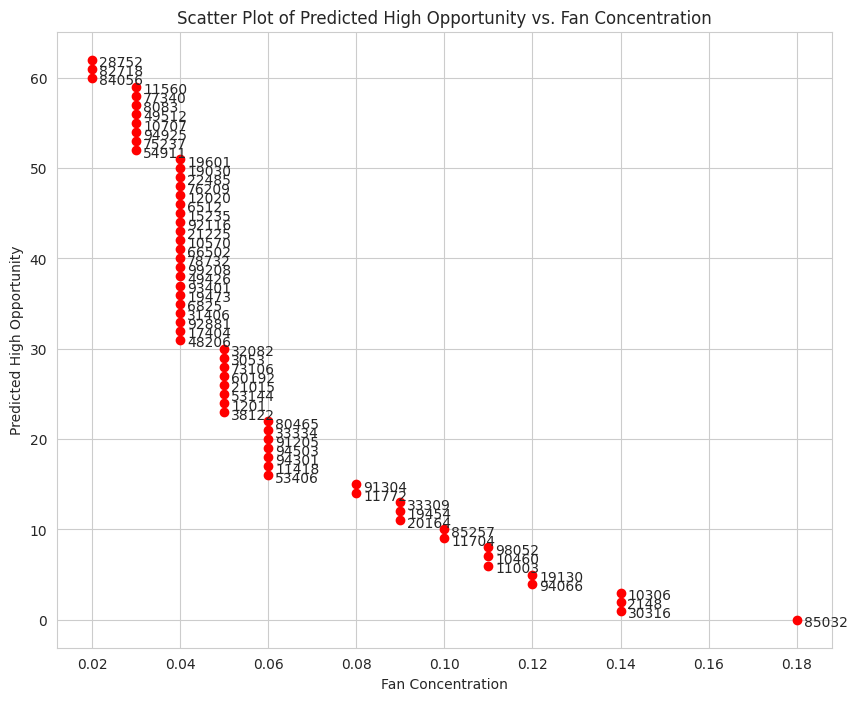

In [ ]:
import matplotlib.pyplot as plt

# Filter data for high priority predictions
high_priority_indices = [i for i, prediction in enumerate(y_pred) if prediction == 0]
high_priority_incomes = df1.iloc[high_priority_indices]['NBA_FAN_CONCENTRATION']
high_priority_zipcodes = df1.iloc[high_priority_indices]['ZIP_CODE']

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(high_priority_incomes, range(len(high_priority_incomes)), color='red', label='High Opportunity')

# Add zip codes as annotations
for i, txt in enumerate(high_priority_zipcodes):
    plt.annotate(txt, (high_priority_incomes.iloc[i], i), xytext=(5, -5), textcoords='offset points')

# Labels and title
plt.xlabel('Fan Concentration')
plt.ylabel('Predicted High Opportunity')
plt.title('Scatter Plot of Predicted High Opportunity vs. Fan Concentration')

# Show plot

In [ ]:
#List of Higest Opportunity Zipcodes for New Fan engagement and Revenue

high_priority_zipcodes = df1.iloc[high_priority_indices]['ZIP_CODE']



for item in high_priority_zipcodes:
    print(item)


85032
30316
2148
10306
94066
19130
11003
10460
98052
11704
85257
20164
19454
33309
11772
91304
53406
11418
94301
94503
91205
33334
80465
38122
1201
53144
21015
60192
73106
3053
32082
48206
17404
92881
31406
6825
19473
93401
49426
99208
78732
66502
10570
21225
92116
15235
6512
12020
76209
22485
19030
19601
54911
75237
94925
10707
49512
8083
77340
11560
84056
82718
28752
